In [1]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from Bio import SeqIO
from Bio.Blast.Applications import NcbiblastpCommandline

from scipy.stats import ttest_ind

from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('../combined_data.csv')
data['autoimmune'] = data['category'] == 'autoimmune'
data.drop('category', axis=1, inplace=True)

In [3]:
# add amino acid composition
for aa in 'ARNDCQEGHILKMFPSTWYV':
    data['%s_composition' % aa] = (data['sequence'].str.count(aa) / data['sequence'].str.len())

In [4]:
data

,fold,id,gene,pe_level,sequence,autoimmune,A_composition,R_composition,N_composition,D_composition,...,L_composition,K_composition,M_composition,F_composition,P_composition,S_composition,T_composition,W_composition,Y_composition,V_composition
0,4,A0A075B6H9,IGLV4-69,1,MAWTPLLFLTLLLHCTGSLSQLVLTQSPSASASLGASVKLTCTLSS...,True,0.067227,0.025210,0.008403,0.042017,...,0.134454,0.033613,0.016807,0.016807,0.042017,0.176471,0.075630,0.025210,0.042017,0.016807
1,3,A0A075B6N2,TRBV20-1,3,MLLLLLLLGPGSGLGAVVSQHPSRVICKSGTSVKIECRSLDFQATT...,True,0.063063,0.036036,0.018018,0.027027,...,0.135135,0.054054,0.036036,0.045045,0.036036,0.135135,0.081081,0.009009,0.027027,0.054054
2,4,A0A087WZ39,TRBV15,1,MGPGLLHWMALCLLGTGHGDAMVIQNPRYQVTQFGKPVTLSCSQTL...,True,0.061404,0.043860,0.061404,0.061404,...,0.105263,0.035088,0.043860,0.052632,0.061404,0.070175,0.061404,0.017544,0.052632,0.035088
3,4,A0A0A0MS06,TRBV23-1,1,MGTRLLGCAALCLLAADSFHAKVTQTPGHLVKGKGQKTKMDCTPEK...,True,0.078261,0.017391,0.034783,0.026087,...,0.113043,0.086957,0.034783,0.043478,0.043478,0.078261,0.069565,0.008696,0.026087,0.034783
4,3,A0A0G2JHM8,MOG,1,MASLSRPSLPSCLCSFLLLLLLQVSSSYAGQFRVIGPRHPIRALVG...,True,0.044068,0.098305,0.016949,0.033898,...,0.149153,0.040678,0.010169,0.047458,0.064407,0.057627,0.033898,0.013559,0.030508,0.071186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20643,4,P0DMU3,NaN,3,MVSSKGLWKERPSAHTSECFSTTACPVAFILLVWNSQTPAGLQSLC...,False,0.094675,0.082840,0.029586,0.017751,...,0.082840,0.017751,0.005917,0.023669,0.076923,0.118343,0.076923,0.029586,0.000000,0.047337
20644,4,Q6ZSN1,NaN,2,MGVPRAREGRGAGSQSPPRGRCLHPFRWGSQDRGRGEGLALSPLLP...,False,0.067485,0.122699,0.000000,0.024540,...,0.092025,0.012270,0.012270,0.012270,0.153374,0.104294,0.018405,0.024540,0.000000,0.049080
20645,2,Q96M85,NaN,2,MSHSRRAAPTQDQCHTPGFPTSRETSGSIWQARICGSLQALDTWRT...,False,0.096045,0.062147,0.039548,0.022599,...,0.079096,0.050847,0.005650,0.022599,0.096045,0.096045,0.073446,0.022599,0.011299,0.028249
20646,2,Q96NJ1,NaN,2,MRRERPELRDAEGRLRLRAGCLVTAWPRAPSGAGSWSMAAASPWPA...,False,0.150000,0.121429,0.000000,0.021429,...,0.078571,0.000000,0.014286,0.014286,0.135714,0.142857,0.028571,0.035714,0.000000,0.028571


### Generate violin plots for each amino acid composition feature

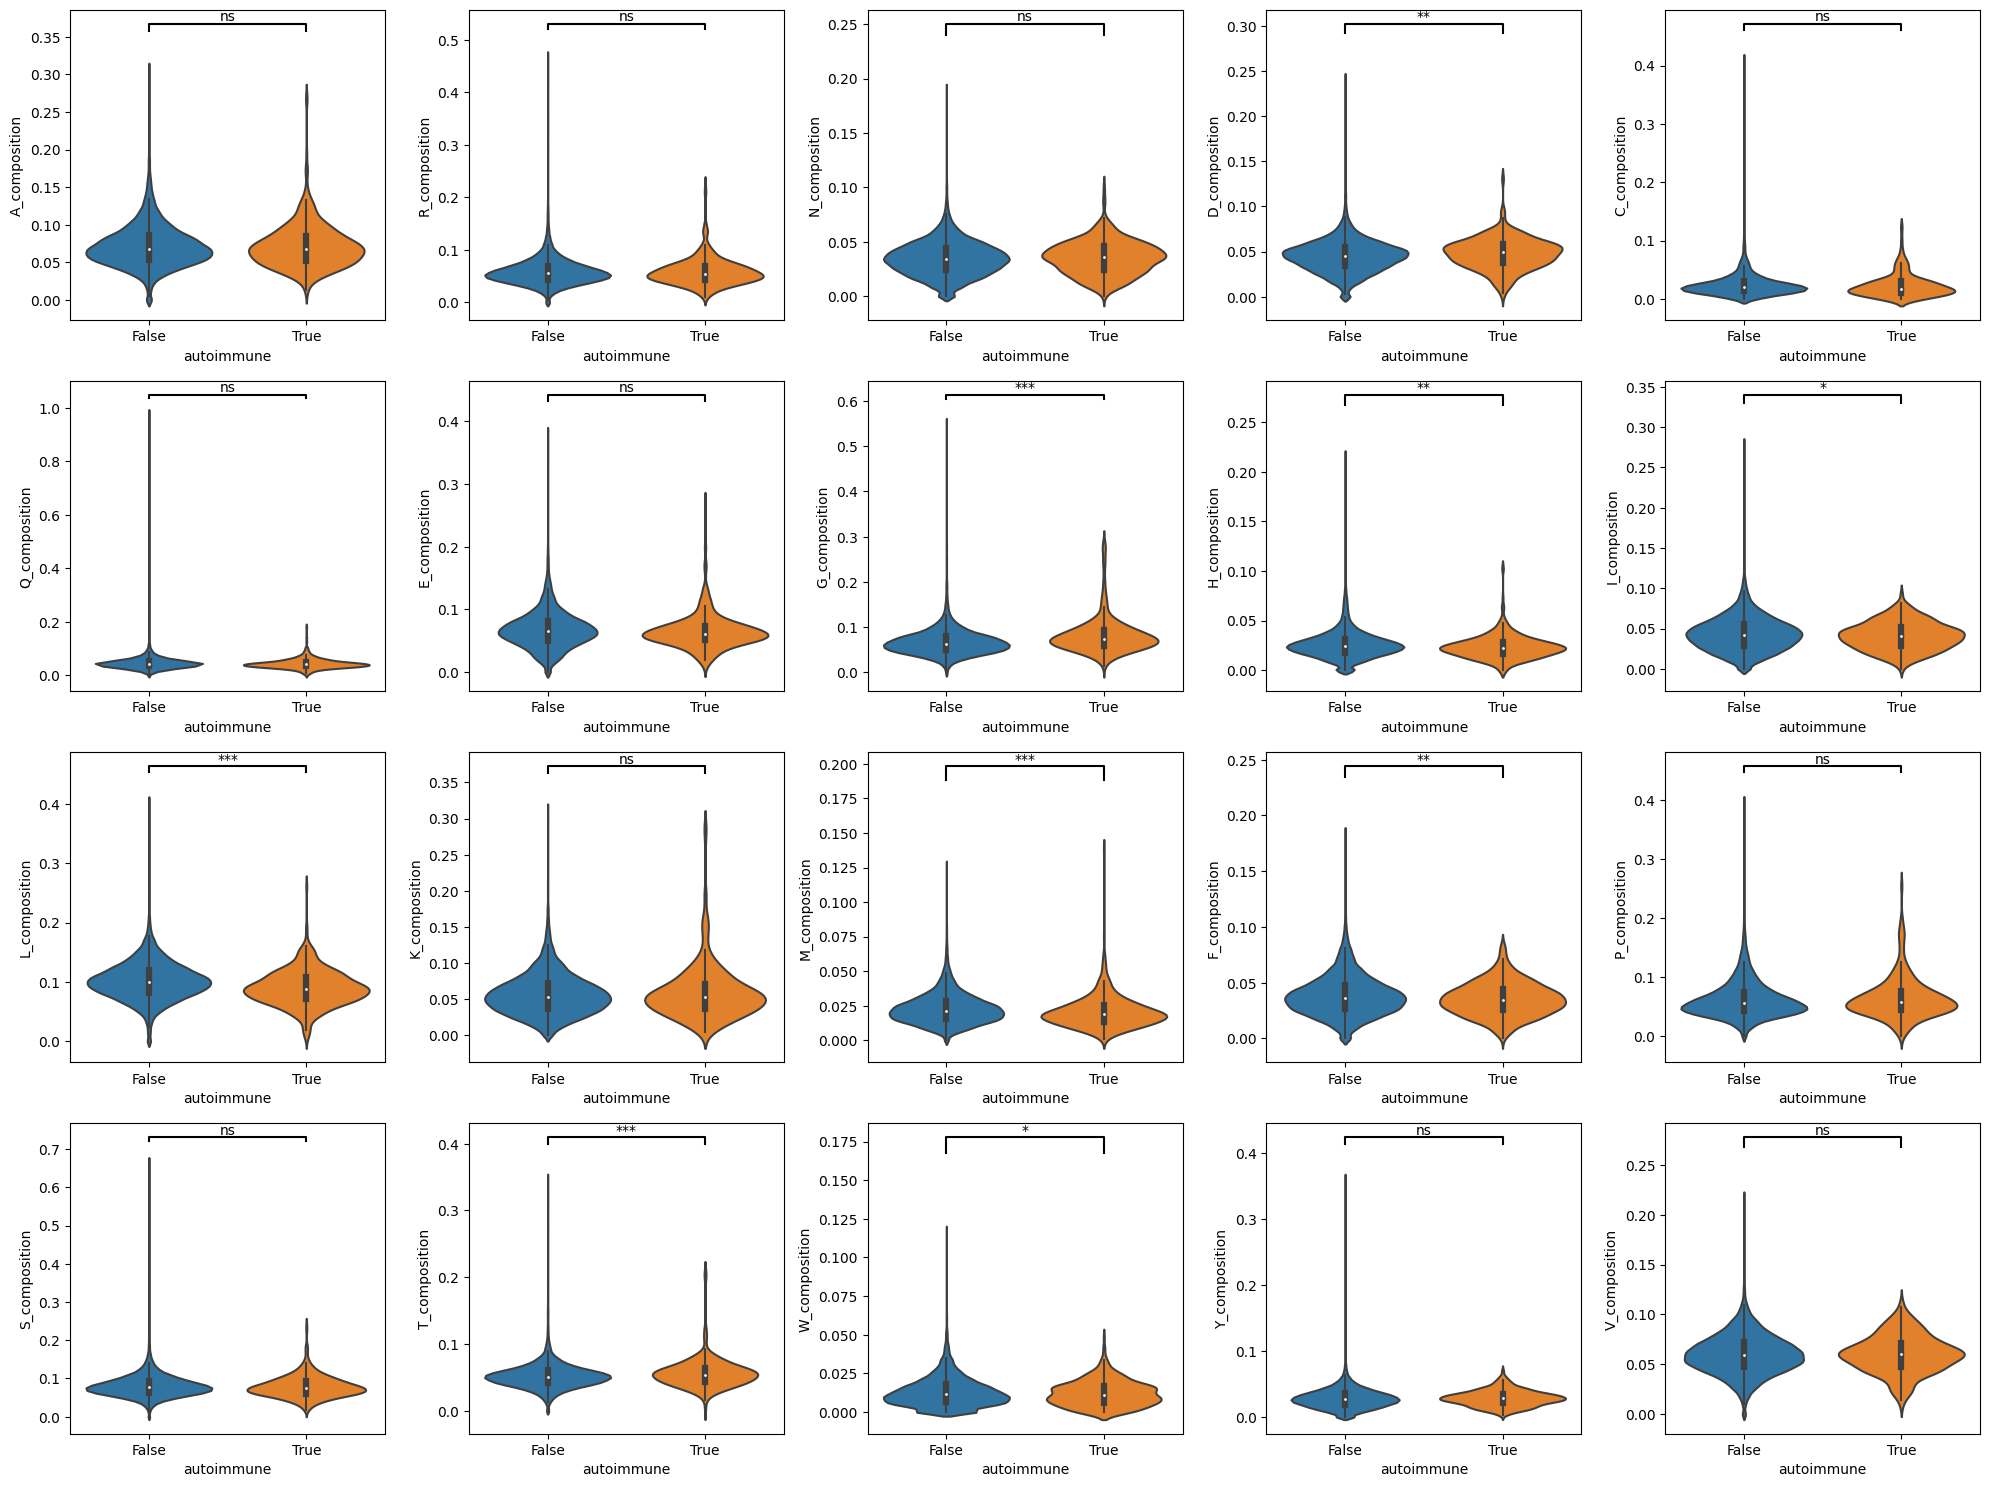

In [5]:
fig, axes = plt.subplots(4, 5, figsize=(20, 15))

for aa, ax in zip('ARNDCQEGHILKMFPSTWYV', axes.flat):
    p = ttest_ind(data[data['autoimmune']]['%s_composition' % aa], data[~data['autoimmune']]['%s_composition' % aa])[1]
    if p < 0.0001:
        sig = '***'
    elif p < 0.01:
        sig = '**'
    elif p < 0.05:
        sig = '*'
    else:
        sig = 'ns'
    
    x1, x2 = 0, 1 
    y, h, col = data['%s_composition' % aa].max() + 0.05, 0.01, 'k'
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y+h, sig, ha='center', va='bottom', color=col)
    
    sns.violinplot(data=data, x='autoimmune', y='%s_composition' % aa, ax=ax)
plt.tight_layout()

In [15]:
data

,fold,id,gene,pe_level,sequence,autoimmune,A_composition,R_composition,N_composition,D_composition,...,L_composition,K_composition,M_composition,F_composition,P_composition,S_composition,T_composition,W_composition,Y_composition,V_composition
0,4,A0A075B6H9,IGLV4-69,1,MAWTPLLFLTLLLHCTGSLSQLVLTQSPSASASLGASVKLTCTLSS...,True,0.067227,0.025210,0.008403,0.042017,...,0.134454,0.033613,0.016807,0.016807,0.042017,0.176471,0.075630,0.025210,0.042017,0.016807
1,3,A0A075B6N2,TRBV20-1,3,MLLLLLLLGPGSGLGAVVSQHPSRVICKSGTSVKIECRSLDFQATT...,True,0.063063,0.036036,0.018018,0.027027,...,0.135135,0.054054,0.036036,0.045045,0.036036,0.135135,0.081081,0.009009,0.027027,0.054054
2,4,A0A087WZ39,TRBV15,1,MGPGLLHWMALCLLGTGHGDAMVIQNPRYQVTQFGKPVTLSCSQTL...,True,0.061404,0.043860,0.061404,0.061404,...,0.105263,0.035088,0.043860,0.052632,0.061404,0.070175,0.061404,0.017544,0.052632,0.035088
3,4,A0A0A0MS06,TRBV23-1,1,MGTRLLGCAALCLLAADSFHAKVTQTPGHLVKGKGQKTKMDCTPEK...,True,0.078261,0.017391,0.034783,0.026087,...,0.113043,0.086957,0.034783,0.043478,0.043478,0.078261,0.069565,0.008696,0.026087,0.034783
4,3,A0A0G2JHM8,MOG,1,MASLSRPSLPSCLCSFLLLLLLQVSSSYAGQFRVIGPRHPIRALVG...,True,0.044068,0.098305,0.016949,0.033898,...,0.149153,0.040678,0.010169,0.047458,0.064407,0.057627,0.033898,0.013559,0.030508,0.071186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20643,4,P0DMU3,NaN,3,MVSSKGLWKERPSAHTSECFSTTACPVAFILLVWNSQTPAGLQSLC...,False,0.094675,0.082840,0.029586,0.017751,...,0.082840,0.017751,0.005917,0.023669,0.076923,0.118343,0.076923,0.029586,0.000000,0.047337
20644,4,Q6ZSN1,NaN,2,MGVPRAREGRGAGSQSPPRGRCLHPFRWGSQDRGRGEGLALSPLLP...,False,0.067485,0.122699,0.000000,0.024540,...,0.092025,0.012270,0.012270,0.012270,0.153374,0.104294,0.018405,0.024540,0.000000,0.049080
20645,2,Q96M85,NaN,2,MSHSRRAAPTQDQCHTPGFPTSRETSGSIWQARICGSLQALDTWRT...,False,0.096045,0.062147,0.039548,0.022599,...,0.079096,0.050847,0.005650,0.022599,0.096045,0.096045,0.073446,0.022599,0.011299,0.028249
20646,2,Q96NJ1,NaN,2,MRRERPELRDAEGRLRLRAGCLVTAWPRAPSGAGSWSMAAASPWPA...,False,0.150000,0.121429,0.000000,0.021429,...,0.078571,0.000000,0.014286,0.014286,0.135714,0.142857,0.028571,0.035714,0.000000,0.028571


In [6]:
from sklearn.metrics import RocCurveDisplay

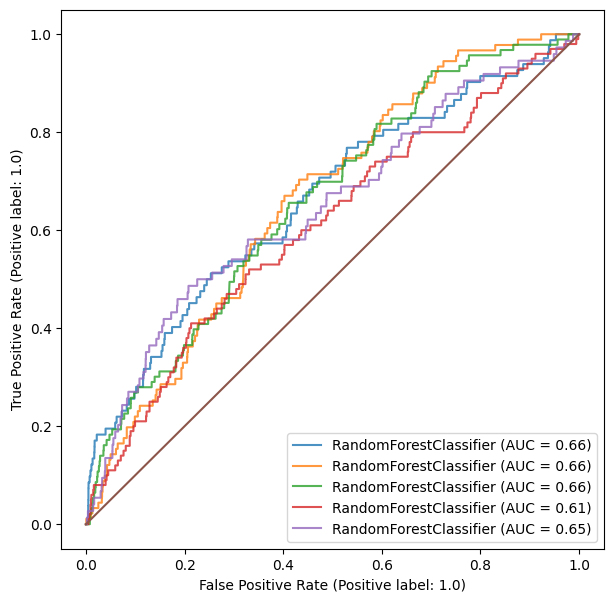

In [9]:
ax = plt.figure(figsize=(7, 7)).gca()
for j in range(1, 6):
    X_train = data[data['fold'] != j].iloc[:, 6:]
    y_train = data[data['fold'] != j]['autoimmune']
    X_test = data[data['fold'] == j].iloc[:, 6:]
    y_test = data[data['fold'] == j]['autoimmune']

    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, alpha=0.8)
    
ax.plot([0, 1])

### Train only on amino acid compositions that are statistically significant.

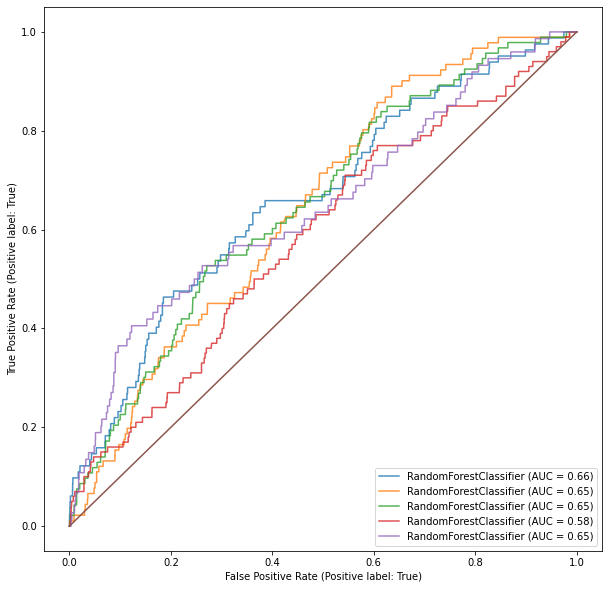

In [151]:
ax = plt.figure(figsize=(10, 10)).gca()
for j in range(1, 6):
    X_train = data[data['fold'] != j].loc[:, ['G_composition', 'H_composition', 'I_composition', 'L_composition', 'M_composition', 'F_composition', 'T_composition', 'W_composition']]
    y_train = data[data['fold'] != j]['autoimmune']
    X_test = data[data['fold'] == j].loc[:, ['G_composition', 'H_composition', 'I_composition', 'L_composition', 'M_composition', 'F_composition', 'T_composition', 'W_composition']]
    y_test = data[data['fold'] == j]['autoimmune']

    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, alpha=0.8)
    
ax.plot([0, 1])


